<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0726_%EC%A3%BC%EC%9D%98_%EC%82%AC%ED%95%AD%EB%93%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 학습 데이터와 평가데이터의 분리
# training data, validation data, test data

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

raw_df = pd.read_csv('./data/ozone/ozone.csv')
#1) 결치값 처리
#2) 이강치 처리
#3) 정규화 처리

df = raw_df.dropna(how='any') # any 행 있으면 날려버려라
# df = raw_df.dropna(how='any')
# print(df.shape)
# display(df)

# 데이터셋을 분리
x_data = df[['Solar.R','Wind','Temp']].values
t_data = df['Ozone'].values.reshape(-1,1)

# 이제 학습데이터와 test 데이터 분리
(x_data_train, x_data_test, t_data_train, t_data_test) = \
train_test_split(x_data,
                t_data,
                test_size=0.3,
                random_state=0)
# 항상 같은 값 잡아라 seed값 잡기
# 파이썬에 특징 \ 밑에 이어준다. xdata 부터~ t_data test 까지
model = linear_model.LinearRegression()

# 학습을 진행
model.fit(x_data_train, t_data_train)



LinearRegression()

In [ ]:
# multinomial classification 예제
# bmi 데이터를 가지고 다중 분류에 대한 학습, 예측 정확도 측정해보기

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# 정규화 키랑 몸무게 차이가 큼
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# raw data loading 파일 가지고 오기

df = pd.read_csv('./data/bmi/bmi.csv',skiprows=3)
#위에 3줄부터 사용 못하는 부분  #3행부터 읽어라
display(df.head(), df.shape) # (20000, 3)

# 데이터 전처리부터 해야함
# 1. 결측치 부터 확인
print(df.isnull().sum()) # 컬럼 결치값 합치기  상태보니 결치값 없음 있으면 drop

# 2. 이상치도 없다.box plot 같은 걸로 확인해보기
#boxplot 그림 ~

# 3. 데이터의 편향 같은게 있는지

#데이터 전처리 확인 하기

# 데이터를 나누어서 처리하기

# split # data 4개로 쪼개버림
x_data_train, x_data_test, t_data_train, t_data_test =  \
train_test_split(df[["height","weight"]].values,  # 2차원 파일 values
                df['label'].values.reshape(-1,1), #2차원 reshape (-1,1) 1행열
                test_size=0.3, # 30% 6000 test 평가 70% 14000는 학습 활용
                random_state=0  # 다음 실행 seed 값 랜덤 그대로 저장 변경x
                ) # one-hot ecoding 써야함 kears 가 알아서 작업처리함

# 정규화 진행 , 분류값이여서 정규화 할 필요없다  x_data 에서만 하면 된다.
scaler = MinMaxScaler()
scaler.fit(x_data_train) # 최대,최소 알려줌

x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# 변수 필요 만들기 # test 정규화

# keras model
keras_model = Sequential()

# model안의 layer 추가 add
keras_model.add(Flatten(input_shape=(2, ))) # input layer 부터 현재 독립변수 2개
keras_model.add(Dense(3, activation='softmax' )) # class 3개여서

# model 설정   # 2진 binary_cross #categorical 다양한 클래스 #sparse 너가 알아서해
# 평가를 기준 잡자.metrics=['accuracy'] 평가기준 기본적으로
# 1e-4 에서 1e-2 변경
keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy']
                   )

# 학습시작 #fit 반복으로
# 정규화 데이터 넣어야 norm
# t_data_train 학습
# 14000 데이터 가지고 100번 학습
# 몇번 반복 한방 데이터 크면 못하니 데이터 배치해서 10개씩 짤라서
# batch_size 100개 씩 해서 데이터 넣어서 학습 시켜라
# verbose 한줄씩 출력
# 14000개 데이터를 0.2로 짤라서 2800개에 validation 으로

result = keras_model.fit(x_data_train_norm,
               t_data_train,
                epochs=100,
                batch_size=100,
                verbose=1,
                validation_split=0.2
               )
# result 변수 받음 # validation 나누어서 처리


,label,height,weight
0,1,188,71
1,2,161,68
2,0,178,52
3,2,136,63
4,1,145,52


(20000, 3)

label     0
height    0
weight    0
dtype: int64
Epoch 1/100
112/112 [==============================] - 1s 3ms/step - loss: 0.9273 - accuracy: 0.5608 - val_loss: 0.8163 - val_accuracy: 0.6511
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 0.7554 - accuracy: 0.7062 - val_loss: 0.6953 - val_accuracy: 0.7650
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7829 - val_loss: 0.6156 - val_accuracy: 0.8011
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.8184 - val_loss: 0.5590 - val_accuracy: 0.8382
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.8457 - val_loss: 0.5138 - val_accuracy: 0.8471
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.8670 - val_loss: 0.4790 - val_accuracy: 0.8768
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy:

In [ ]:
# 모델 학습이 끝났으니 평가를 진행
# test_data 줘야함
print(keras_model.evaluate(x_data_test_norm,t_data_test))
# 0.98416668176651 98%


188/188 [==============================] - 0s 614us/step - loss: 0.0998 - accuracy: 0.9842
[0.09983178973197937, 0.98416668176651]


In [ ]:
# 예측을 해보자. (predict)
my_data = np.array([[178,72]]) # 정규화 해서 데이터 넣어야한다.
                               #
# predict_result = keras_model.predict(my_data)
predict_result = keras_model.predict(scaler.transform(my_data))

print(predict_result)


1/1 [==============================] - 0s 37ms/step
[[6.2908774e-04 9.6497983e-01 3.4391128e-02]]


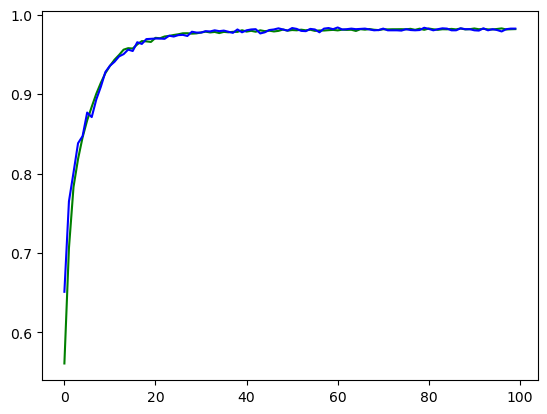

In [ ]:
# 학습 과정중에 나온 데이터를 이용해서 우리 그래프 그리자.
# result
# print(result.history)
# history - dictionary
            # key 값은 : loss, accuracy, val_loss, val_accuracy
            # value값은 : epoch에 따른 각 값의 list
            #loss는 epoch이 증가할 수록 값이 작아져야 정상
            # accuracy는 epoch이 증가할 수록 값이 커져야 정상

#그래프
import matplotlib.pyplot as plt
# 나온 결과값이 loss 정상적으로 값이 떨어진다.
# plt.plot(result.history['loss'],color='r')

plt.plot(result.history['accuracy'],color='g')
plt.plot(result.history['val_accuracy'],color='b')
# 정상값이 같이 움직인다. val 위,아래 움직인다.

plt.show()

